In [ ]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Overview

This notebook demonstrates how to enrich your data using Generative AI with Vertex AI on Google Cloud.

The specific example is a retail use case for improving product description metadata. Better product descriptions lead to more user engagement and higher conversion rates.


The workflow includes:
* Importing the data
* Analyzing the product metadata
* Enriching the data with an LLM
* Updating the data

# Getting Started

In [9]:
# Install the Vertex AI SDK

# This step currently includes an additional dependency, to avoid a conflict

!pip install openai pandas python-dotenv matplotlib numpy scipy



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 3.3 MB/s eta 0:00:003.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.2/155.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 18.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 22.2 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 20.3 MB/s eta 0:00:0031m23.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 22.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 8.9 MB/s eta 0:00:00


**Restart** the runtime to use these package versions.

# Import data

This notebook requires downloading the [Flipkart Products](https://www.kaggle.com/datasets/PromptCloudHQ/flipkart-products?resource=download) dataset from Kaggle.

After downloading the data, upload the CSV file to the notebook using the Files feature of Colab.

In [8]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv("raw_product_data.csv", engine="python")

# Filter out blank rows
df = df.dropna(how="all")

# Print the first five rows of the data
df.head()

,id,GTIN,external_id,URL,Bild,Titel,Beschreibung,Eigenschaften,Marke,Kategorie,...,Anzahl Batterien,Batterien enthalten,Starthilfestrom in Ah,Schwierigkeitsgrad,Produktfarbe NF,Optik,Laub,Rosentyp,Züchter,Blueten
0,39b782de-7aa7-4598-aafd-e6770a2eaaa0,5.761020e+13,6104950,https://www.jumbo.ch/maschinen-werkstatt/bekle...,https://www.jumbo.ch/img/products/402Wx268H/61...,. . . 3M™ Mehrweg-Halbmaske mit Wechselfiltern...,Effektiver Schutz: Die 3M™ Farbspritz-Mehrwegm...,Wiederverwendbare Atemschutzmaske für Farbspri...,3M,40603.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68f8dd55-4c90-4f74-8547-78e34eb977ed,3.100350e+12,6336316,https://www.jumbo.ch/maschinen-werkstatt/besch...,https://www.jumbo.ch/img/products/402Wx268H/63...,". . . 3M™ Sliders Sp62N14, Möbelgleiter braun ...","Möbel mühelos verschieben, auch schwere Stücke...",Extra starker Klebstoff,3M,4050304.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bb52940b-1f40-48f5-9413-db97a48b3187,8.423220e+12,6899264,https://www.jumbo.ch/maschinen-werkstatt/besch...,https://www.jumbo.ch/img/products/402Wx268H/68...,".Moebelknoepf Segelboot, 54X81 MM",NaN,NaN,NaN,4050110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ae10152f-39d0-428d-bcbe-86b5b637a29b,7.627540e+12,7100535,https://www.jumbo.ch/hobby-sport/autozubehoer/...,https://www.jumbo.ch/img/products/402Wx268H/71...,0ecoplan Auto-Scheibenreiniger 500Ml,NaN,NaN,Oecoplan,8070102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8364f617-ff56-4b79-88b9-4e4113c5db27,4.006890e+12,4813481,https://www.jumbo.ch/maschinen-werkstatt/werks...,https://www.jumbo.ch/img/products/402Wx268H/48...,1 Lochwand Step II,Praktische und einfache Aufbewahrung von Werkz...,Belastbar bis 50 kg.,Wolfcraft,4030201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Analysis

Let's now look at the product description field. To keep things simple, we'll use the length of the description as a proxy for data quality.

We'll look for short descriptions, where it's likely that useful details are omitted.

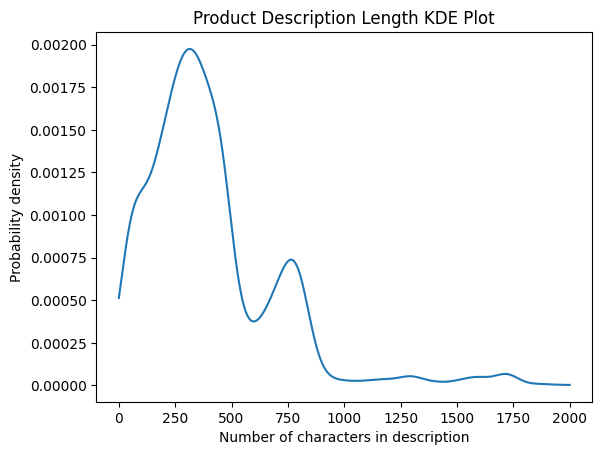

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

def get_num_chars_in_description(dataframe: pd.DataFrame) -> pd.Series:
  # Get the number of characters in the description field
  num_chars_in_description = dataframe["Beschreibung"].str.len()

  # Try converting the number of characters to numerics before plotting the distribution
  try:
    # If it is string type, remove all characters except numbers, ".", "+" or "-".
    if pd.api.types.is_string_dtype(num_chars_in_description):
      num_chars_in_description = num_chars_in_description.str.replace(r"[^\d\-+\.]", "")
    num_chars_in_description = pd.to_numeric(num_chars_in_description)
  except:
    pass

  # Drop the rows with NA values
  num_chars_in_description = num_chars_in_description.dropna()

  # Convert the number of characters to integers
  num_chars_in_description = num_chars_in_description.astype(int)

  return num_chars_in_description

def plot_distribution(series: pd.Series) -> None:
  # Create a kernel density estimate (KDE) object
  kde = gaussian_kde(series)

  # Evaluate the PDF at a range of points
  x = np.linspace(0, max(series), 1000)
  y = kde(x)

  # Plot the smoothed distribution function

  plt.plot(x, y)
  plt.xlabel("Number of characters in description")
  plt.ylabel("Probability density")
  plt.title("Product Description Length KDE Plot")
  plt.show()

num_chars_in_description = get_num_chars_in_description(df)
plot_distribution(num_chars_in_description)

Let's now set a threshold to improve the shortest 0.05% of our descriptions. We see that 93 characters should be that threshold, and there are 13 descriptions of that length or less.

In [27]:
threshold = int(num_chars_in_description.quantile(0.1))

threshold

84

In [33]:
def get_rows_under_threshold(series: pd.Series, threshold) -> pd.Series:
  return num_chars_in_description.loc[series <= threshold]

rows_with_description_under_threshold = get_rows_under_threshold(num_chars_in_description, 250)

print(rows_with_description_under_threshold.shape[0])

1954


# Data Transformation

Next, let's collect the relevant details from each row with short descriptions. We'll put that into a JSON structure that we'll pass into the large language model.

In [63]:
import json

# Create a JSON object for each row
json_objects = []
for index, row in df.loc[rows_with_description_under_threshold.index].iterrows():
  dirty_dict = row.to_dict()
  cleaned_dict = {key: value for key, value in dirty_dict.items() if value == value}
  json_objects.append(cleaned_dict)



{'id': '39b782de-7aa7-4598-aafd-e6770a2eaaa0', 'GTIN': 57610200000000.0, 'external_id': 6104950, 'URL': 'https://www.jumbo.ch/maschinen-werkstatt/bekleidung-schutz/diverser-arbeitsschutz/---3m-mehrweg-halbmaske-mit-wechselfiltern-6002c-fuer-farbspritz-und-maschinenschleifarbeiten-schutzstufe-a2p2/p/6104950', 'Bild': 'https://www.jumbo.ch/img/products/402Wx268H/6104950_001.jpg?_=1660885612115', 'Titel': '. . . 3M™ Mehrweg-Halbmaske mit Wechselfiltern 6002C, für Farbspritz- und Maschinenschleifarbeiten, Schutzstufe A2P2', 'Beschreibung': 'Effektiver Schutz: Die 3M™ Farbspritz-Mehrwegmaske 6002C bietet einen effektiven Schutz gegen organische Gase und Dämpfe (Schutzstufe A2) sowie gegen Partikel (Schutzstufe P2).', 'Eigenschaften': 'Wiederverwendbare Atemschutzmaske für Farbspritzarbeiten, den Farbauftrag mit Pinsel und Roller sowie das Schleifen von Hand oder mit einem ExzenterschleiferDieses Produkt schützt vor bestimmten organischen Gasen und Dämpfen in Konzentrationen A2-Schutz vor or

We can now include this JSON array into a prompt to query the LLM with.

In [ ]:
prompt = f"""
Erstellen Sie eine überzeugende und genaue Produktbeschreibung für jedes der Produkte, die in der untenstehenden JSON-Datenstruktur bereitgestellt werden. Diese Beschreibung sollte in der Ausgabe enthalten sein.

Die Ausgabe sollte ein JSON-Array sein, das nur aus den ursprünglichen id und den aktualisierten Beschreibung Feldern für jedes Produkt besteht.
===
{json}
"""

print(prompt)

# Query LLM

In this step, we'll connect to a Vertex AI LLM with our prompt and return a result.

First, let's define some project parameters:

In [133]:
from openai import OpenAI
from dotenv import dotenv_values

updated_df = df.copy()

client = OpenAI(
    api_key=dotenv_values(".env")["OPENAI_API_KEY"],
)
result_array = []
result_df = pd.DataFrame(columns=["result"])

new_df = pd.DataFrame(columns=["id", "enhanced_description"])
for i in range(0,100):
    json_string = json_objects[i]
    prompt = f"""
            Erstellen Sie eine überzeugende und genaue Produktbeschreibung für jedes der Produkte, die in der untenstehenden JSON-Datenstruktur bereitgestellt werden. Diese Beschreibung sollte in der Ausgabe enthalten sein.

            Die Ausgabe sollte ein JSON-Array sein, das nur aus den ursprünglichen id und den aktualisierten Beschreibung Feldern für jedes Produkt besteht.
            ===
            {json_string}
            """
    
    result = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="gpt-4-1106-preview"
    )
    string = result.choices[0].message.content
    start_index = string.find('{')

    # Find the position of the last '}'
    end_index = string.rfind('}')

    # Check if both characters are found
    if start_index != -1 and end_index != -1:
        json_obj = (json.loads(string[start_index:end_index+1]))
        better_description = {'id': json_obj['id'], 'enhanced_description': json_obj['Beschreibung']}
        new_df.loc[len(new_df)] = better_description
        if i % 2 == 0:
            print(f"Processed {i} rows")
            # save the updated dataframe to a csv file
            new_df.to_csv("updated_product_data.csv", index=False)
        print(better_description)
        
print(updated_df.head())

Processed 0 rows
{'id': '39b782de-7aa7-4598-aafd-e6770a2eaaa0', 'enhanced_description': 'Die 3M™ Mehrweg-Halbmaske 6002C ist ein hochwertiger Atemschutz, der speziell für Farbspritz- und Maschinenschleifarbeiten entwickelt wurde. Mit einem ausgeklügelten Filtersystem schützt sie vor organischen Gasen und Dämpfen wie Lösungsmitteln, Farben, Klebstoffen und Reinigungsmitteln (Schutzstufe A2) sowie vor mittelschweren Partikelbelastungen durch Feinstaub und Nebel auf Öl- oder Wasserbasis (Schutzstufe P2). Die Maske ist wiederverwendbar und die Filter lassen sich einfach austauschen dank des Bajonett-Klick-Verschlusses. Eine verbesserte Atmungsfreiheit und ein geringerer Atemwiderstand werden durch das doppelte Einatemventil und große Filter erreicht. Die Einheitsgröße passt sich komfortabel den meisten Gesichtsformen an. Die Einhaltung der Normen EN 140:1998, 6055: EN 14387:2004 A1:2008 A2 und 5925: EN 143:2000 P2 R gewährleistet die Zuverlässigkeit und Sicherheit der Maske, die in der Far

In [112]:
enhanced_results = []
for item in result_array:
    string = item.choices[0].message.content
    start_index = string.find('{')

    # Find the position of the last '}'
    end_index = string.rfind('}')

    # Check if both characters are found
    if start_index != -1 and end_index != -1:
        enhanced_results.append(json.loads(string[start_index:end_index+1]))
    

print(enhanced_results)

[{'id': '39b782de-7aa7-4598-aafd-e6770a2eaaa0', 'Beschreibung': 'Die 3M™ Mehrweg-Halbmaske mit Wechselfiltern 6002C ist eine robuste und vielseitige Schutzausrüstung für anspruchsvolle Arbeitsumgebungen. Geeignet für Farbspritz- und Maschinenschleifarbeiten sowie andere Tätigkeiten mit organischen Gasen und Dämpfen, bietet die Maske Schutz der Stufe A2 gegen organische Dämpfe wie Lösemittel sowie P2 Schutz gegen Feinstaub und Öl- oder Wasserdämpfe. Die wiederverwendbare Maske zeichnet sich durch ihr Doppel-Einatemventil aus, das eine verbesserte Atmungsaktivität und einen reduzierten Atemwiderstand im Vergleich zu Einzelfiltermasken ermöglicht. Der Bajonett-Klick-Verschluss erlaubt einen einfachen Filterwechsel und ist kompatibel mit einer Vielzahl von Filtern. Die Einheitsgröße und die Eigenschaften entsprechen den Normen EN 140:1998, 6055: EN 14387:2004 A1:2008 A2 und 5925: EN 143:2000 P2 R, was eine hohe Zuverlässigkeit und Sicherheit gewährleistet. Mit einem Gewicht von nur 0.412 k

In [115]:
better_descriptions = {item['id']: item['Beschreibung'] for item in enhanced_results}

print(better_descriptions)

{'39b782de-7aa7-4598-aafd-e6770a2eaaa0': 'Die 3M™ Mehrweg-Halbmaske mit Wechselfiltern 6002C ist eine robuste und vielseitige Schutzausrüstung für anspruchsvolle Arbeitsumgebungen. Geeignet für Farbspritz- und Maschinenschleifarbeiten sowie andere Tätigkeiten mit organischen Gasen und Dämpfen, bietet die Maske Schutz der Stufe A2 gegen organische Dämpfe wie Lösemittel sowie P2 Schutz gegen Feinstaub und Öl- oder Wasserdämpfe. Die wiederverwendbare Maske zeichnet sich durch ihr Doppel-Einatemventil aus, das eine verbesserte Atmungsaktivität und einen reduzierten Atemwiderstand im Vergleich zu Einzelfiltermasken ermöglicht. Der Bajonett-Klick-Verschluss erlaubt einen einfachen Filterwechsel und ist kompatibel mit einer Vielzahl von Filtern. Die Einheitsgröße und die Eigenschaften entsprechen den Normen EN 140:1998, 6055: EN 14387:2004 A1:2008 A2 und 5925: EN 143:2000 P2 R, was eine hohe Zuverlässigkeit und Sicherheit gewährleistet. Mit einem Gewicht von nur 0.412 kg und in der Farbe Grau

In [5]:


# Update the descriptions in a new data frame
updated_df = df.copy()

updated_df['enhanced_description'] = updated_df['id'].map(better_descriptions)

print(updated_df.head())


NameError: name 'df' is not defined

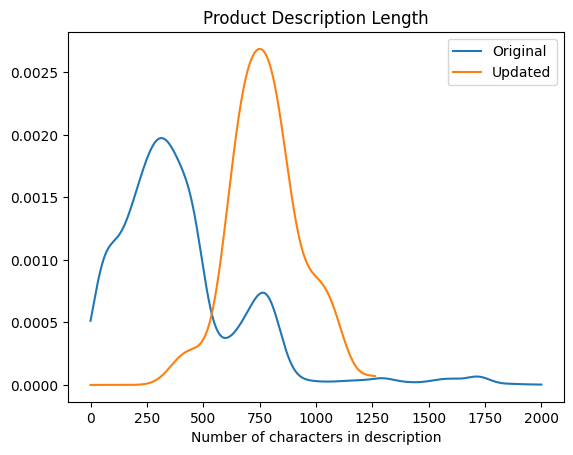

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv("raw_product_data.csv", engine="python")
updated_df = pd.read_csv("updated_product_data.csv", engine="python")

def get_num_chars_in_description(dataframe: pd.DataFrame, label) -> pd.Series:
    # Get the number of characters in the description field
    num_chars_in_description = dataframe[label].str.len()

    # Try converting the number of characters to numerics before plotting the distribution
    try:
        # If it is string type, remove all characters except numbers, ".", "+" or "-".
        if pd.api.types.is_string_dtype(num_chars_in_description):
            num_chars_in_description = num_chars_in_description.str.replace(r"[^\d\-+\.]", "")
        num_chars_in_description = pd.to_numeric(num_chars_in_description)
    except:
        pass

    # Drop the rows with NA values
    num_chars_in_description = num_chars_in_description.dropna()

    # Convert the number of characters to integers
    num_chars_in_description = num_chars_in_description.astype(int)

    return num_chars_in_description

def plot_distributions(series1: pd.Series, series2: pd.Series) -> None:
    # Create a kernel density estimate (KDE) object for each series
    kde1 = gaussian_kde(series1)
    kde2 = gaussian_kde(series2)

    # Evaluate the PDF at a range of points for each series
    x1 = np.linspace(0, max(series1), 1000)
    y1 = kde1(x1)

    x2 = np.linspace(0, max(series2), 1000)
    y2 = kde2(x2)

    # Plot the smoothed distribution functions
    plt.plot(x1, y1, label='Original')
    plt.plot(x2, y2, label='Updated')
    plt.xlabel("Number of characters in description")
    plt.title("Product Description Length")
    plt.legend()
    plt.show()

num_chars_in_description = get_num_chars_in_description(df, "Beschreibung")
num_chars_in_description_updated = get_num_chars_in_description(updated_df, "enhanced_description")

plot_distributions(num_chars_in_description, num_chars_in_description_updated)

